<a href="https://colab.research.google.com/github/JKprojects-stud/apbd-16-cw1/blob/main/EDA_s27808.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. EDA - Tabular Data - Churn Modelling Dataset

The purpose of this exploratory data analysis (EDA) is to understand the structure,
quality, and characteristics of the Churn Modelling dataset before any predictive
modeling is performed.

## Dataset Description

The Churn Modelling dataset is a structured, tabular dataset commonly used in
customer analytics and churn prediction tasks.
This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

- Source: Kaggle https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling
- Number of observations: 10,000
- Number of features: 14
- Target variable: `Exited` (binary indicator of customer churn)

The dataset contains demographic, financial, and behavioral attributes of bank
customers.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
df = pd.read_csv("/content/sample_data/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Quality Assessment

The dataset was inspected for missing values and duplicated records.
No missing values or duplicated observations were identified.

In [11]:
print(df.isnull().sum())
print("\n")
print(f"Duplicates: {df.duplicated().sum()}")

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Duplicates: 0


## Target Variable Distribution

The target variable is imbalanced, with a significantly larger number of non-churned
customers compared to churned customers.

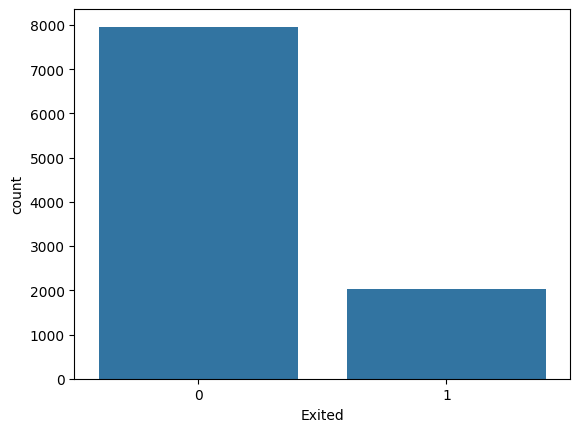

In [16]:
sns.countplot(data=df, x="Exited")
plt.show()

## Categorical Variables Analysis

Customer churn rates vary across geographical regions, suggesting that location-related factors may influence customer behavior. Gender shows weaker differentiation, indicating limited predictive power on its own.

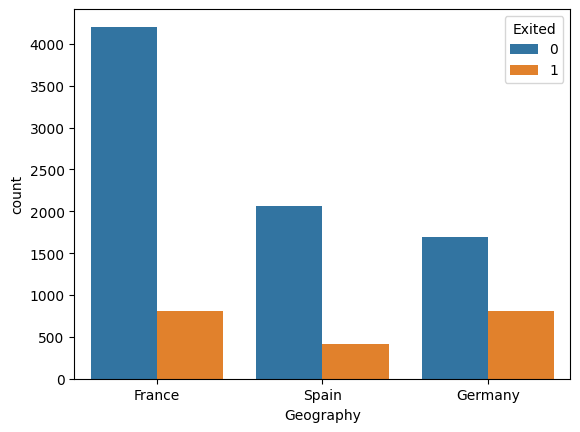

In [17]:
sns.countplot(data=df, x="Geography", hue="Exited")
plt.show()

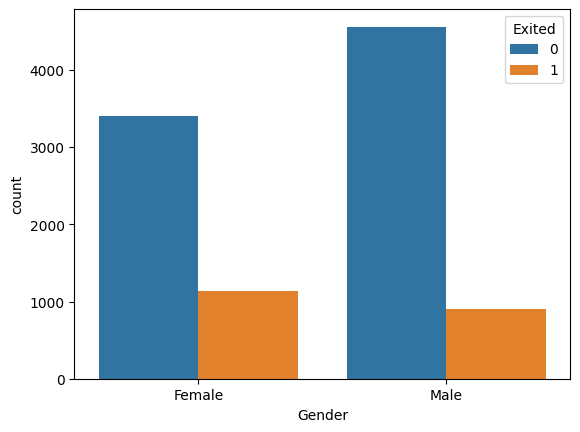

In [18]:
sns.countplot(data=df, x="Gender", hue="Exited")
plt.show()

## Numerical Feature Distributions

Several numerical variables exhibit skewed distributions, particularly account balance. Age shows a more symmetric distribution but spans a wide range, indicating heterogeneous customer groups.

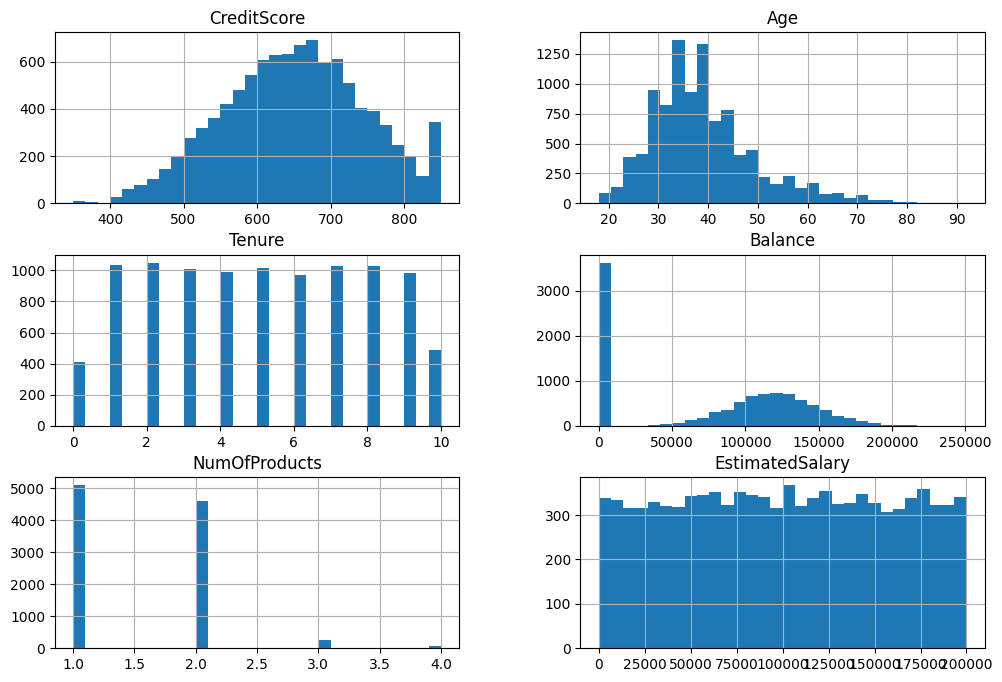

In [20]:
numerical_cols = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary'
]
df[numerical_cols].hist(bins=30, figsize=(12,8))
plt.show()

## Outlier Detection

Outliers were detected in the Age and CreditScore variables based on the IQR rule.
These values represent valid customer profiles (e.g., elderly clients or extreme
credit scores) rather than data errors. Therefore, no outlier removal was applied
at the exploratory stage.

Account balance and estimated salary exhibit significantly larger ranges compared
to other numerical features, which necessitates separate visualization to avoid
scale distortion.

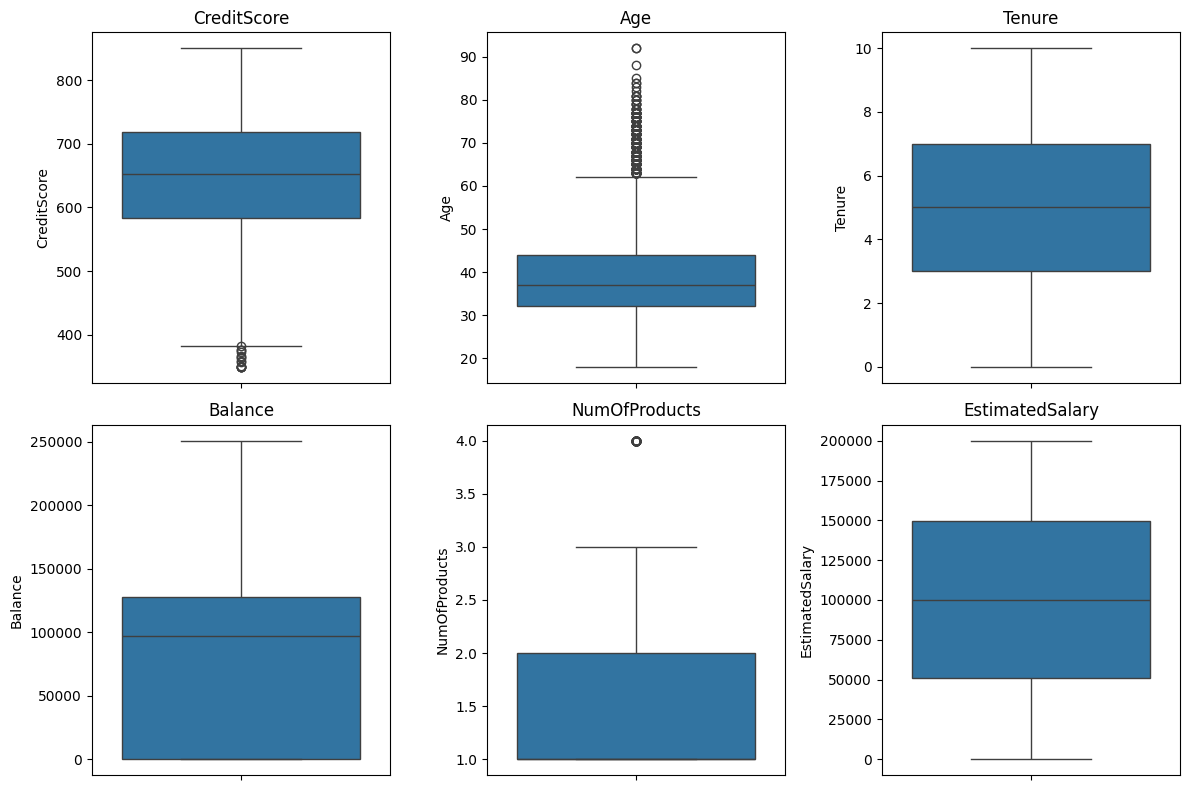

In [23]:
plt.figure(figsize=(12,8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Correlation Analysis

Age and balance show the strongest positive correlation with churn, although correlations remain moderate. This suggests that churn is influenced by multiple interacting factors rather than a single dominant variable.

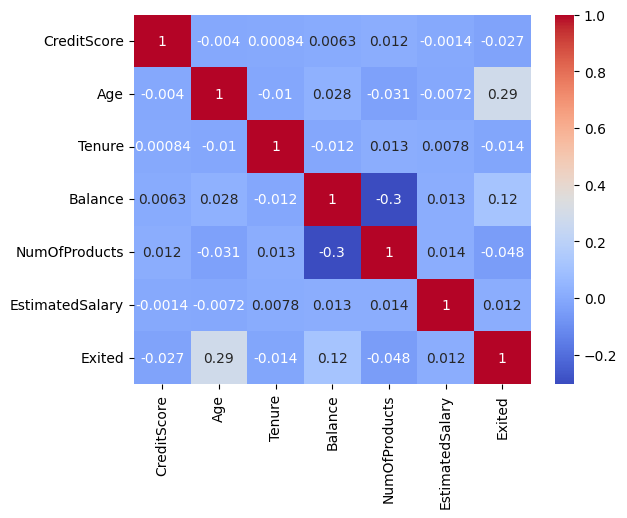

In [24]:
corr = df[numerical_cols + ["Exited"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

## Feature Relationships with Churn

Customers who churn tend to be older and have higher account balances. This may indicate dissatisfaction among higher-value customers.

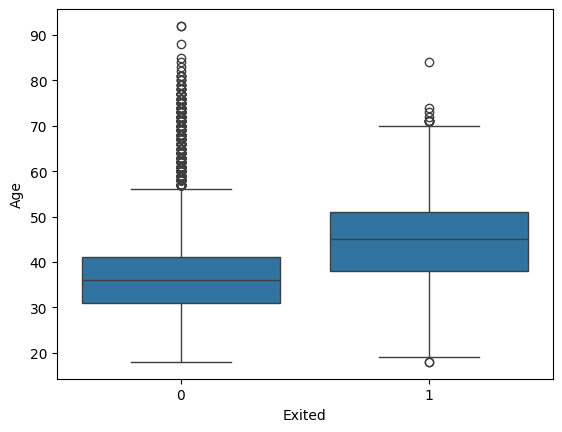

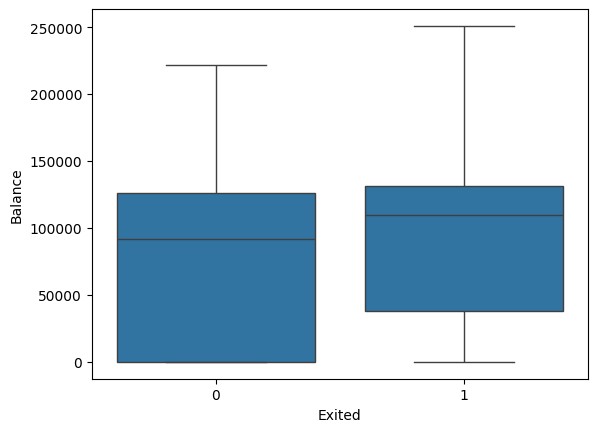

In [25]:
sns.boxplot(data=df, x="Exited", y="Age")
plt.show()

sns.boxplot(data=df, x="Exited", y="Balance")
plt.show()

## Key EDA Findings

- The dataset is clean and well-structured.
- The target variable is imbalanced.
- Age and account balance appear to be the most informative features.
- Categorical features such as geography show meaningful differences in churn rates.
- Outliers are present but appear to be valid observations.

## Recommendations and Next Steps

Based on the exploratory analysis, the following steps are recommended before modeling:
- Encode categorical variables using one-hot encoding.
- Apply feature scaling for numerical variables.
- Address class imbalance using class weighting or resampling techniques.
- Consider interaction effects between age, balance, and activity indicators.


# 2. EDA - Text Data (Spam / Ham Dataset)

The purpose of this exploratory data analysis is to examine the structure,
quality, and characteristics of a text-based dataset containing labeled spam and
non-spam messages.

## Dataset Description

The Spam / Ham dataset is primarily used for spam email detection, not fake email detection. It contains labeled text messages, including emails, categorized into "ham" (legitimate/non-spam) and "spam" (unsolicited and potentially harmful) messages. For detecting fake emails specifically, a different dataset and approach are required, focusing on phishing attempts, spoofed emails, and other forms of deceptive communication.

- Source: Kaggle https://www.kaggle.com/datasets/phangud/spamcsv
- Number of observations: 5,572
- Number of features: 2
- Target variable: `label` (categorical indicator: `ham` or `spam`)

The dataset contains short text messages representing real-world SMS communication,
including informal language, abbreviations, promotional content, and noise typical
for unstructured textual data.

## Data Structure and Feature Types

The dataset originally contains five columns. However, only two columns
(`v1` and `v2`) contain meaningful information.

- `v1` - categorical label indicating message type (`ham` or `spam`)
- `v2` - raw text content of the message

The remaining columns (`Unnamed: 2`, `Unnamed: 3`, `Unnamed: 4`) contain
a very small number of non-null values and do not provide meaningful information.
These columns were removed during the exploratory phase.

In [29]:
df_text = pd.read_csv(
    "/content/sample_data/spam.csv",
    encoding="latin-1"
)

df_text.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [30]:
df_text.info()
df_text['v1'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,count
v1,
ham,4825
spam,747


In [31]:
df_text = df_text[['v1', 'v2']]
df_text.columns = ['label', 'text']

df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Data Quality Assessment

The dataset does not contain missing values in the relevant columns.
However, 403 duplicated records were identified.

These duplicates are likely the result of repeated spam messages and short,
common responses typical for SMS communication. Their presence reflects
real-world messaging behavior rather than data corruption.

In [34]:
print(df_text.isnull().sum())

print(df_text.duplicated().sum())

label    0
text     0
dtype: int64
403


## Basic Statistics

This section presents basic descriptive statistics of the text dataset, including
the number of documents, average message length, and word count.

The dataset consists of short text messages with relatively low average length.
Spam messages tend to be longer and contain more words than legitimate messages,
reflecting their promotional and descriptive nature.

In [35]:
df_text = df_text.copy()

df_text['text_length'] = df_text['text'].str.len()
df_text['word_count'] = df_text['text'].str.split().str.len()

df_text[['text_length', 'word_count']].describe()

,text_length,word_count
count,5572.000000,5572.000000
mean,80.118808,15.494436
std,59.690841,11.329427
min,2.000000,1.000000
25%,36.000000,7.000000
50%,61.000000,12.000000
75%,121.000000,23.000000
max,910.000000,171.000000


## Target Variable Distribution

The distribution of the target variable is analyzed to assess class balance
between spam and non-spam messages.

The dataset is imbalanced, with legitimate ("ham") messages significantly
outnumbering spam messages.

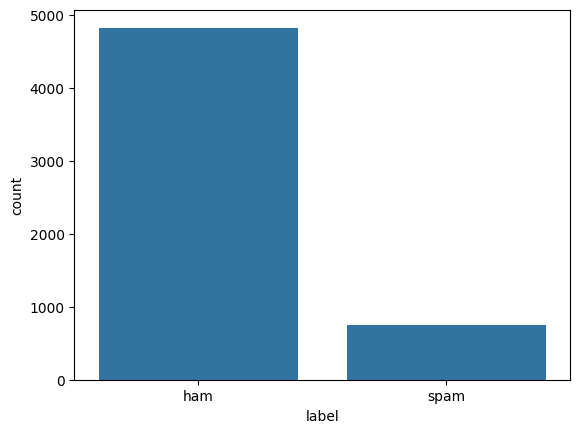

In [36]:
sns.countplot(data=df_text, x='label')
plt.show()

## Tokenization and Preprocessing Evaluation

Tokenization and basic text preprocessing were applied to assess the impact
of noise reduction techniques such as stopword removal.

The dataset contains informal language, abbreviations, and non-standard spelling
typical for SMS communication. Stopword removal significantly reduces noise while
preserving informative content.

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df_text['tokens'] = df_text['text'].str.lower().apply(word_tokenize)
df_text['tokens_clean'] = df_text['tokens'].apply(
    lambda x: [w for w in x if w.isalpha() and w not in stop_words]
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Word Frequency Analysis

This section explores the distribution of word frequencies using unigrams and
bigrams to identify common linguistic patterns. Frequent unigrams include conversational terms as well as words related to
promotions and urgency ("call", "get", "free", "come"), which are characteristic of spam messages.

In [39]:
from collections import Counter

all_words = [word for tokens in df_text['tokens_clean'] for word in tokens]
Counter(all_words).most_common(20)

[('u', 1120),
 ('call', 576),
 ('get', 385),
 ('ur', 381),
 ('gt', 318),
 ('lt', 316),
 ('go', 278),
 ('free', 278),
 ('know', 261),
 ('ok', 250),
 ('got', 249),
 ('like', 244),
 ('good', 241),
 ('come', 229),
 ('time', 216),
 ('day', 203),
 ('love', 201),
 ('want', 193),
 ('send', 191),
 ('text', 189)]

In [40]:
from nltk.util import bigrams

all_bigrams = []
for tokens in df_text['tokens_clean']:
    all_bigrams.extend(list(bigrams(tokens)))

Counter(all_bigrams).most_common(10)

[(('lt', 'gt'), 276),
 (('gon', 'na'), 58),
 (('please', 'call'), 54),
 (('call', 'later'), 50),
 (('u', 'r'), 42),
 (('let', 'know'), 39),
 (('r', 'u'), 39),
 (('sorry', 'call'), 38),
 (('wan', 'na'), 38),
 (('good', 'morning'), 31)]

## TF-IDF Keyword Exploration

TF-IDF was used to identify terms that are informative across the dataset by
down-weighting common words and emphasizing discriminative vocabulary.

TF-IDF analysis highlights promotional, urgency-related, and reward-based terms,
which are typical indicators of spam messages.

Class-specific TF-IDF analysis reveals a clear distinction between spam and
non-spam messages.

Spam messages are characterized by promotional and urgency-related terms such as
"free", "prize", "cash", "claim", and "reply", as well as technical tokens related
to message delivery and costs (e.g., "txt", "mobile", "150p", "www").

In contrast, non-spam ("ham") messages predominantly contain conversational and
informal vocabulary such as "ok", "just", "come", and "home", reflecting natural
interpersonal communication.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=2000,
    ngram_range=(1, 2)
)

X_tfidf = tfidf.fit_transform(df_text['text'])
feature_names = tfidf.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

In [42]:
tfidf_df.mean().sort_values(ascending=False).head(20)

,0
ok,0.019334
just,0.015854
ll,0.014156
ur,0.013300
come,0.013279
like,0.012851
know,0.012776
got,0.012470
good,0.012357
gt,0.012305


In [43]:
tfidf_df['label'] = df_text['label'].values

spam_tfidf = tfidf_df[tfidf_df['label'] == 'spam'].drop(columns='label').mean()
ham_tfidf  = tfidf_df[tfidf_df['label'] == 'ham'].drop(columns='label').mean()

spam_tfidf.sort_values(ascending=False).head(15)

,0
free,0.048856
txt,0.036986
text,0.032755
mobile,0.030652
stop,0.030464
claim,0.028227
reply,0.026621
ur,0.025368
www,0.025294
new,0.024224


In [44]:
ham_tfidf.sort_values(ascending=False).head(15)

,0
ok,0.022121
ll,0.016176
just,0.015974
come,0.015233
like,0.014231
gt,0.014210
lt,0.014104
got,0.014102
good,0.013794
know,0.013772


## Sentiment Exploration

Sentiment analysis was conducted to explore whether emotional tone differs
between spam and non-spam messages.

Spam messages tend to exhibit more extreme sentiment values, often using emotionally
charged language to provoke user response.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


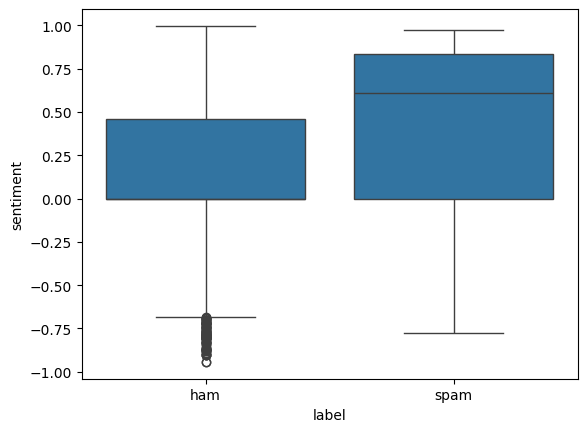

In [45]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df_text['sentiment'] = df_text['text'].apply(
    lambda x: sia.polarity_scores(x)['compound']
)

sns.boxplot(data=df_text, x='label', y='sentiment')
plt.show()

## Noise and Data Quality Issues

The dataset contains several types of noise typical for real-world SMS communication:
- Informal language, abbreviations, and colloquial expressions
- URLs, phone numbers, and numeric tokens related to message delivery or pricing
- Special characters and occasional encoding artifacts

These characteristics do not indicate data corruption but reflect the natural
variability of user-generated text.

## Key Findings – Text Data

- The dataset exhibits moderate class imbalance.
- Spam messages are generally longer and more repetitive than non-spam messages.
- TF-IDF analysis highlights promotional and urgency-related vocabulary in spam messages.
- Informal language and textual noise are prevalent across the dataset.
- The dataset is well suited for classical NLP classification approaches.

## Recommendations and Next Steps

Based on the exploratory analysis, the following steps are recommended:
- Apply text normalization and cleaning techniques.
- Remove or normalize URLs, phone numbers, and special characters.
- Use TF-IDF or word embedding representations for feature extraction.
- Address class imbalance during model training using appropriate techniques.